In [24]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

ModuleNotFoundError: No module named 'geopandas'

In [27]:
df_particles = pd.read_csv('./data/Spain/Particles/data.csv')  
map_data = gpd.read_file('./data/Spain/Particles/natalidad.geojson')

NameError: name 'gpd' is not defined

In [29]:
# For definition please look at: https://www.eea.europa.eu/data-and-maps/data/aqereporting-8
# [+] Show table definition
#   -> Air Quality annual statistics:
df_particles.sample(5)

,CountryOrTerritory,ReportingYear,UpdateTime,StationLocalId,SamplingPointLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AggregationType,Namespace,Unit,BeginPosition,EndPosition,Validity,Verification,DataCoverage,DataCapture,TimeCoverage,AQValue
199833,Spain,2017,2019-11-19T07:16:29.033333Z,STA_ES1174A,SP_27038003_1_38,42.726111,-7.451944,Sulphur dioxide (air),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ug.m-3,2017-01-01,2018-01-01,Valid,Verified,94.246575,98.005698,96.164384,13.708333
85038,Spain,2014,2019-02-21T22:52:33.613333Z,STA_ES1892A,SP_08015021_7_8,41.443984,2.237875,Nitrogen monoxide (air),1 year hour max,ES.BDCA.AQD,ug.m-3,2014-01-01,2015-01-01,Valid,Verified,87.579909,100.000000,87.579909,300.000000
11650,Spain,2015,2019-02-21T23:23:00.903333Z,STA_ES1557A,SP_15041001_14_6,43.259700,-8.555000,Ozone (air),1 year hour min,ES.BDCA.AQD,ug.m-3,2015-01-01,2016-01-01,Valid,Verified,99.760274,100.000000,99.760274,2.000000
203471,Spain,2014,2019-02-21T23:02:29.616666Z,STA_ES1815A,SP_08305006_30_M,41.346823,1.686575,Benzene (air),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ug.m-3,2014-01-01,2015-01-01,Not valid,Verified,27.397260,100.000000,27.397260,1.000000
113168,Spain,2017,2019-07-18T14:50:06.033333Z,STA_ES1747A,SP_31201014_10_49,42.826940,-1.649440,Particulate matter < 10 µm (aerosol),1 year day max,ES.BDCA.AQD,ug.m-3,2017-01-01,2018-01-01,Valid,Verified,98.630137,98.630137,100.000000,58.916667


In [31]:
polluants = df_particles['Pollutant'].value_counts()
polluants

Ozone (air)                             58749
Nitrogen dioxide (air)                  32172
Sulphur dioxide (air)                   31721
Particulate matter < 10 µm (aerosol)    25565
Nitrogen monoxide (air)                 11568
                                        ...  
Acenaphthylene (precip+dry_dep)            10
Acenaphthene (precip+dry_dep)              10
m-Xylene (air)                              8
1-Hexene (air)                              4
Total gaseous mercury (air+aerosol)         4
Name: Pollutant, Length: 106, dtype: int64

In [19]:
#for key, value in polluants.items() :
#    print (key, value)
locations = df_particles.groupby(['SamplingPoint_Latitude','SamplingPoint_Longitude']).size().reset_index().rename(columns={0:'count'})
locations

,SamplingPoint_Latitude,SamplingPoint_Longitude,count
0,27.763652,-15.563851,432
1,27.772597,-15.541880,432
2,27.801278,-15.461157,371
3,27.831766,-17.921671,173
4,27.869070,-15.387150,350
...,...,...,...
652,43.570500,-5.958300,265
653,43.579200,-5.927300,257
654,43.669400,-7.378900,108
655,43.684444,-7.431944,122


In [8]:
geometry = [Point(xy) for xy in zip(df_particles['SamplingPoint_Longitude'], df_particles['SamplingPoint_Latitude'])]
geo_df = gpd.GeoDataFrame(df_particles, geometry = geometry)
geo_df['AQValue'] = np.log(geo_df['AQValue']+1)

/usr/lib64/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/lib64/python3.8/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/lib64/python3.8/site-packages/matplotlib/colors.py:1025: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/usr/lib64/python3.8/site-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/lib64/python3.8/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


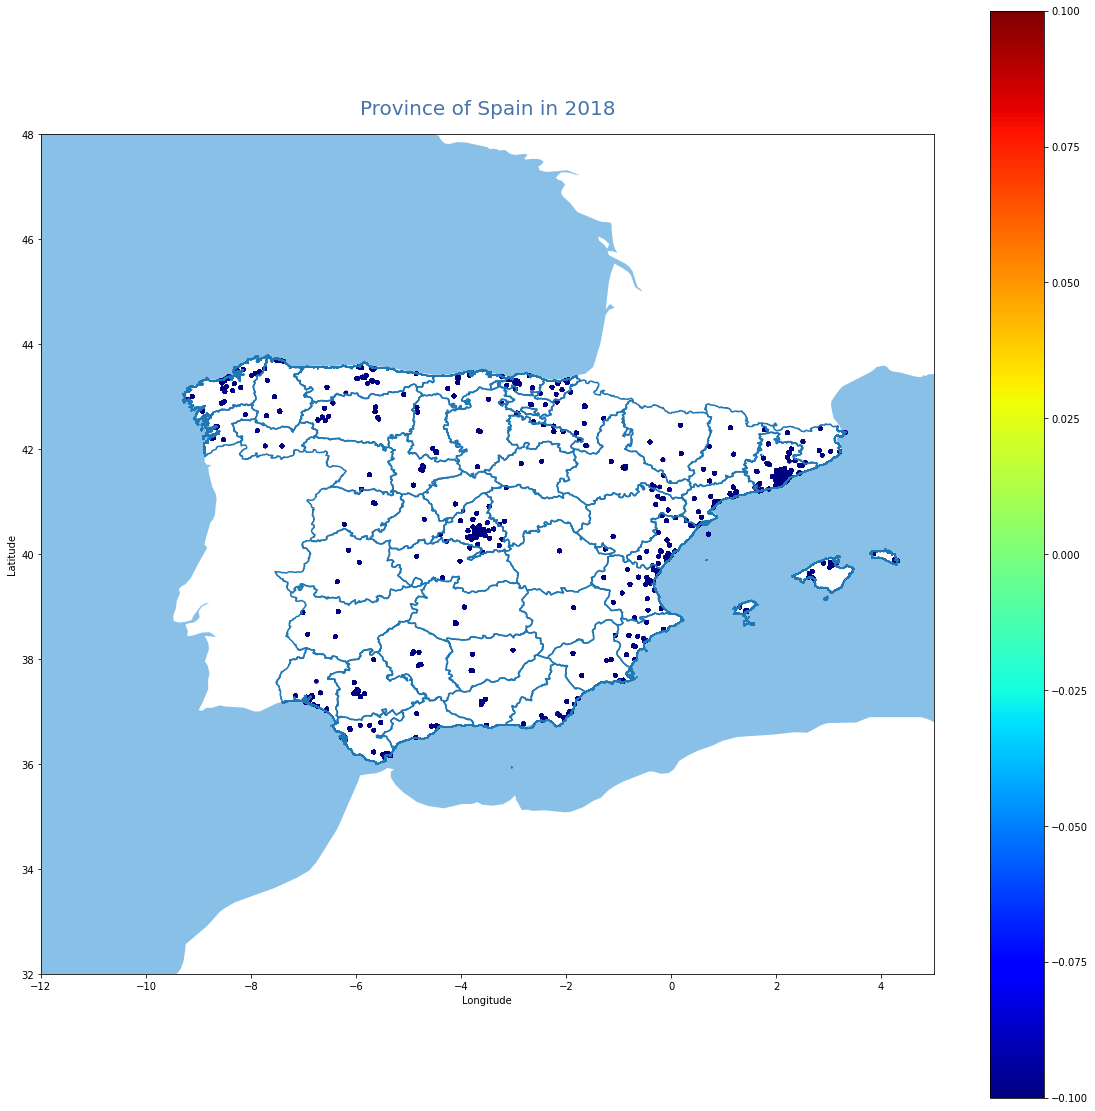

In [10]:
# New figure
fig, ax = plt.subplots(figsize=(20, 20))
 
# Control del título y los ejes
ax.set_title('Province of Spain in 2018', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
 
# Plot the map
map_data.boundary.plot(ax=ax, zorder=5)
geo_df.plot(column='AQValue', cmap='jet',ax=ax, alpha=0.5, legend=True, markersize=10)

# Cargar un mapa base con contornos de países
oceanos = "./data/Spain/Particles/ne_50m_ocean.shp"
map_oceanos = gpd.read_file(oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
plt.show()

In [11]:
df_particles[df_particles['ReportingYear'] == 2018]

,CountryOrTerritory,ReportingYear,UpdateTime,StationLocalId,SamplingPointLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AggregationType,Namespace,Unit,BeginPosition,EndPosition,Validity,Verification,DataCoverage,DataCapture,TimeCoverage,AQValue,geometry
0,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,95.195811,100.0,95.195811,3.812967,POINT (-2.96337 43.14407)
1,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1635A,SP_03014006_14_6,38.359444,-0.471944,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,97.131148,100.0,97.131148,4.321313,POINT (-0.47194 38.35944)
2,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1781A,SP_11020004_14_6,36.688550,-6.117240,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,98.178506,100.0,98.178506,4.395868,POINT (-6.11724 36.68855)
3,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1838A,SP_28009001_14_6,40.599700,-3.503300,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,98.884335,100.0,98.884335,4.428578,POINT (-3.50330 40.59970)
4,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1422A,SP_28079035_14_6,40.419167,-3.703333,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,95.833333,100.0,95.833333,4.007391,POINT (-3.70333 40.41917)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219972,Spain,2018,2019-09-05T21:07:07.603333Z,STA_ES1247A,SP_07026002_96_M,38.906480,1.435370,Benzo(k)fluoranthene in PM10 (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ng.m-3,2018-01-01,2019-01-01,Not valid,Verified,5.479452,100.0,5.479452,0.067659,POINT (1.43537 38.90648)
219973,Spain,2018,2019-09-05T21:07:07.603333Z,STA_ES1654A,SP_41088001_96_M,37.994350,-5.666870,Benzo(k)fluoranthene in PM10 (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ng.m-3,2018-01-01,2019-01-01,Not valid,Verified,21.369863,100.0,21.369863,0.087095,POINT (-5.66687 37.99435)
219974,Spain,2018,2019-09-05T21:07:07.603333Z,STA_ES1182A,SP_46131002_96_M,38.966667,-0.190000,Benzo(k)fluoranthene in PM10 (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ng.m-3,2018-01-01,2019-01-01,Not valid,Verified,12.602740,100.0,12.602740,0.039221,POINT (-0.19000 38.96667)
219975,Spain,2018,2019-09-05T21:07:07.603333Z,STA_ES1957A,SP_15030027_96_M,43.382800,-8.409200,Benzo(k)fluoranthene in PM10 (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ng.m-3,2018-01-01,2019-01-01,Valid,Verified,79.452055,100.0,79.452055,0.182322,POINT (-8.40920 43.38280)
